In [61]:
import numpy as np
import pandas as pd

from scipy.optimize import curve_fit
from scipy.optimize import minimize

import matplotlib.pyplot as plt

In [212]:
T_data = np.loadtxt('T.csv')
k_data = np.loadtxt('K.csv')

In [144]:
def k_model(T, A, B):
    return A * np.exp(B * T**(-1/3))

# Функция MAPE
def mape_loss(params):
    A, B = params
    k_pred = k_model(T_data, A, B)
    return np.mean(np.abs((k_data - k_pred) / k_data)) * 100  # В процентах

# Оптимизация
result = minimize(mape_loss, x0=[1e-14, 100], method='Nelder-Mead')  # Nelder-Mead устойчив к шумам
A_fit, B_fit = result.x

print(f"Оптимальные параметры: A = {A_fit:.3e}, B = {B_fit:.2f}")
print(f"MAPE = {mape_loss([A_fit, B_fit]):.2f}%")

Оптимальные параметры: A = 1.401e-11, B = -47.85
MAPE = 23.52%


In [107]:
def k_model(T, A, B):
    return A * np.exp(B * T**(-1/3))

params, covariance = curve_fit(k_model, T_data, k_data, p0=[1e-14, 100])  
A_fit, B_fit = params

print(f"Подобранные параметры: A = {A_fit:.3e}, B = {B_fit:.3f}")

Подобранные параметры: A = 2.154e-11, B = -53.581


In [145]:
def k_model(T, A, B, C):
    return A * np.exp(B * T**(-1/3) + C * T**(-1/2))

params, _ = curve_fit(k_model, T_data, k_data, p0=[1.0, -10.0, 0.01])
A_fit, B_fit, C_fit = params

print(f"Подобранные параметры: A = {A_fit:.3e}, B = {B_fit:.3f}, C = {C_fit:.3f}")

Подобранные параметры: A = 4.428e-09, B = -261.356, C = 490.657


In [183]:
def k_model(T, A, B, C):
    return A * T**(-1/3) * np.exp(B * T**(-1/3) + C * T**(-1/2))

params, _ = curve_fit(k_model, T_data, k_data, p0=[1.0, -10.0, 0.01])
A_fit, B_fit, C_fit = params

print(f"Подобранные параметры: A = {A_fit:.3e}, B = {B_fit:.3f}, C = {C_fit:.3f}")

Подобранные параметры: A = 4.752e-03, B = -1274.887, C = 3743.623


In [214]:
def k_model(T, A, B, C, D, n):
    return A * T**(-1/3) * np.exp(B * T**(-1/3) + C * T**(-1/2)) 

params, _ = curve_fit(k_model, T_data, k_data, p0=[1.0, -10.0, 0.01, 0.01, 10.0])
A_fit, B_fit, C_fit, D_fit, n_fit= params

print(f"Подобранные параметры: A = {A_fit:.3e}, B = {B_fit:.3f}, C = {C_fit:.3f}, D = {D_fit:.3f}, D = {n_fit:.3f}")

Подобранные параметры: A = -6.102e-09, B = -31.801, C = 45.199, D = 0.000, D = 30076702.186


In [101]:
def k_model(T, A, N):
    return A * T ** N * np.exp(-A/T)

params, _ = curve_fit(k_model, T_data, k_data, p0=[1.0, 1.0])
A_fit, N_fit = params

print(f"Подобранные параметры: A = {A_fit:.3e}, B = {N_fit:.3f}")

Подобранные параметры: A = 3.286e-18, B = 1.499


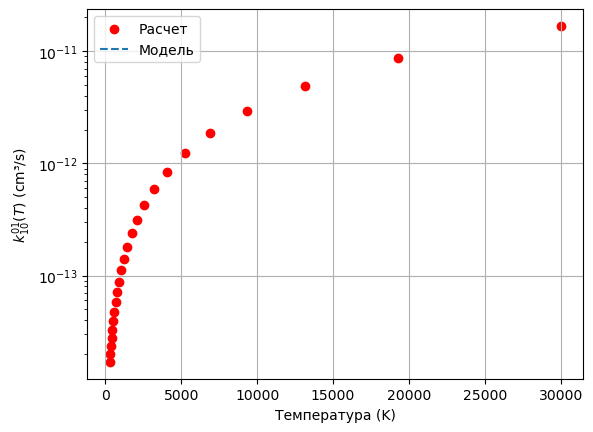

MSE = 3.221e+229


In [199]:
# k_pred = k_model(T_data, A_fit, B_fit)
# k_pred = k_model(T_data, A_fit, B_fit, C_fit)
k_pred = k_model(T_data, A_fit, B_fit, C_fit, D_fit)
#k_pred = k_model(T_data, A_fit, N_fit)

fig, ax = plt.subplots()

ax.scatter(T_data, k_data, label='Расчет', color='red')
# ax.plot(T_data, k_pred, label=f'Модель: $A \exp(B T^{{-1/3}})$\n$A$={A_fit:.2e}, $B$={B_fit:.2f}', linestyle='--')
ax.plot(T_data, k_pred, label=f'Модель', linestyle='--')
plt.xlabel('Температура (K)')
plt.ylabel('$k_{10}^{01}(T)$ (cm³/s)')

ax.set_yscale('log')
plt.legend()
plt.grid(True)
plt.show()

mse = np.mean((k_data - k_pred)**2)
print(f"MSE = {mse:.3e}")

In [200]:
def k_10_01(T):
    return A_fit * np.exp(B_fit * T**(-1/3))

def k_i(T, i, k):
    return k_10_01(T) * (i + 1) * (k + 1)

In [201]:
n_points = 24
T_min, T_max = 5000, 100000  
T_data = np.linspace(T_min**(-1/3), T_max**(-1/3), n_points) ** (-3)

K_data = []
for i in range(len(T_data)):
    k = k_10_01(T_data[i])
    K_data.append(k)
    print('k:', k)

df = pd.DataFrame({'T': T_data})
df.to_csv('T1.csv', index=False, header=False)

df = pd.DataFrame({'K': K_data})
df.to_csv('K1.csv', index=False, header=False)

k: -3.419141111668018e-14
k: -3.474492729851435e-14
k: -3.530740421503441e-14
k: -3.5878986929327466e-14
k: -3.645982285287059e-14
k: -3.7050061783548305e-14
k: -3.7649855944285515e-14
k: -3.825936002230589e-14
k: -3.8878731209025776e-14
k: -3.950812924059398e-14
k: -4.01477164390877e-14
k: -4.0797657754375617e-14
k: -4.145812080665844e-14
k: -4.21292759296983e-14
k: -4.281129621474786e-14
k: -4.350435755519072e-14
k: -4.4208638691904335e-14
k: -4.4924321259357414e-14
k: -4.565158983245356e-14
k: -4.6390631974133173e-14
k: -4.7141638283746114e-14
k: -4.7904802446207284e-14
k: -4.868032128194815e-14
k: -4.946839479767679e-14


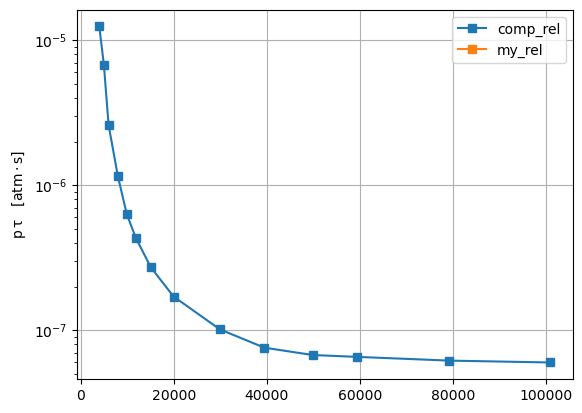

In [202]:
fig, ax = plt.subplots()

data_1 = pd.read_csv('rel_comp.csv', sep=';', header=None)
comp, = ax.plot(data_1[0]**(-3), data_1[1], '-s')
# comp, = ax.plot(data_1[0], data_1[1], '-s')
comp.set_label('comp_rel')

data_2 = pd.read_csv('FHO_FR1.csv', sep=' ', header=None)
# fho, = ax.plot(data_2[0]**(-1/3), data_2[1], '-s')
fho, = ax.plot(data_2[0], data_2[1], '-s')
fho.set_label('my_rel')

# plt.xlabel('T^(-1/3)')
# plt.xlabel('T')
plt.ylabel(r'$\mathrm{ p \, \tau \quad [atm \cdot s]}$')
ax.set_yscale('log')
plt.legend()
plt.grid(True)
plt.show()

In [166]:
data_comp = pd.read_csv('fho10_3000.csv', sep=';', header=None)

temperature = 3000
data_reg = []
ii = []
for i in range(0, 40):
    ii.append(i)
    data_reg.append(k_i(temperature, 0, i))

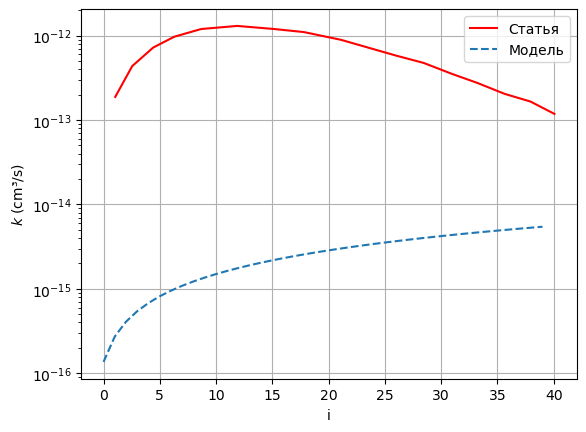

In [167]:
fig, ax = plt.subplots()

ax.plot(data_comp[0], data_comp[1], label='Статья', color='red')
ax.plot(ii, data_reg, label=f'Модель', linestyle='--')
plt.xlabel('i')
plt.ylabel('$k$ (cm³/s)')
ax.set_yscale('log')
plt.legend()
plt.grid(True)
plt.show()